In [1]:
print("Hello WOrld")

Hello WOrld


SSIM between original and blurred images: 0.8220
SSIM between original and smoothed images: 0.7675


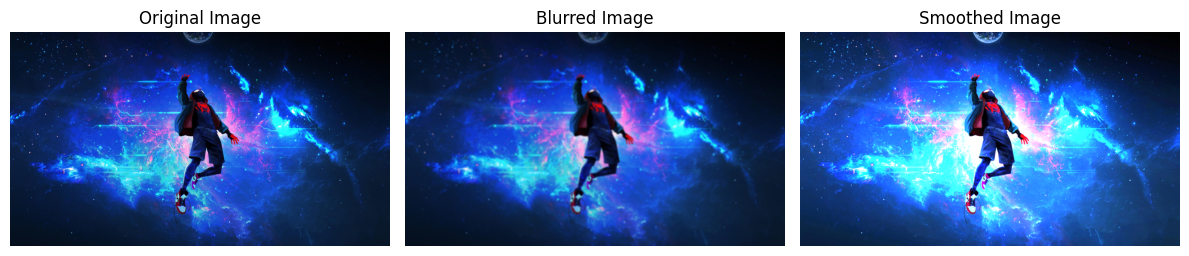

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

image = cv2.imread('pxfuel.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kernel_size = 9

blur_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

blurred = cv2.filter2D(image_rgb, -1, blur_kernel)

smooth_kernel = np.array([[2, 2, 2], [2, 10, 2], [2, 2, 2]], dtype=np.float32) / 13

smoothed = cv2.filter2D(image_rgb, -1, smooth_kernel)

gray_original = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
gray_smoothed = cv2.cvtColor(smoothed, cv2.COLOR_RGB2GRAY)

ssim_original_blurred, _ = ssim(gray_original, gray_blurred, full=True)
ssim_original_smoothed, _ = ssim(gray_original, gray_smoothed, full=True)


print(f'SSIM between original and blurred images: {ssim_original_blurred:.4f}')
print(f'SSIM between original and smoothed images: {ssim_original_smoothed:.4f}')

fig, axs = plt.subplots(1,3, figsize=(12, 10))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(blurred)
axs[1].set_title('Blurred Image')
axs[1].axis('off')

axs[2].imshow(smoothed)
axs[2].set_title('Smoothed Image')
axs[2].axis('off')
plt.tight_layout()
plt.show()